<a href="https://colab.research.google.com/github/Khushbu1985/GenerativeAI/blob/main/Graphy_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [6]:
pip install pandas

In [51]:
df_spam = pd.read_csv('https://raw.githubusercontent.com/Khushbu1985/GenerativeAI/main/Collusion_data.csv')

In [52]:
df_spam.head()

,id,fraud,name,email_id,phone_number,connection
0,1,0,Aditya Sharma,AdiSharma@gmail.com,9876614987,AdiSharma@gmail.com
1,2,1,Priya Patel,PriPatel@gmail.com,9842634348,AyuPatel@gmail.com
2,3,1,Priya Patel,PriPatel@gmail.com,9842634348,JhaKhanna@gmail.com
3,4,1,Arjun Singh,ArjSingh@gmail.com,9829992806,cam9534@virtualmail.com
4,5,1,Arjun Singh,ArjSingh@gmail.com,9829992806,RiySingh@ymail.com


In [69]:
column_edge = 'phone_number'
column_ID = 'email_id'

data_to_merge = df_spam[[column_ID, column_edge]].dropna(subset=[column_edge]).drop_duplicates() # select columns, remove NaN

# To create connections between people who have the same number,
# join data with itself on the 'ID' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}),
    on=column_edge
)

In [70]:
data_to_merge.head()

,email_id,phone_number,email_id_2
0,AdiSharma@gmail.com,9876614987,AdiSharma@gmail.com
1,PriPatel@gmail.com,9842634348,PriPatel@gmail.com
2,PriPatel@gmail.com,9842634348,AyuPatel@gmail.com
3,PriPatel@gmail.com,9842634348,JhaKhanna@gmail.com
4,AyuPatel@gmail.com,9842634348,PriPatel@gmail.com


In [71]:
# By joining the data with itself, people will have a connection with themselves.
# Remove self connections, to keep only connected people who are different.
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])] \
    .dropna()[[column_ID, column_ID+"_2", column_edge]]

# To avoid counting twice the connections (person 1 connected to person 2 and person 2 connected to person 1)
# we force the first ID to be "lower" then ID_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)

In [72]:
d.head()

,email_id,email_id_2,phone_number
4,AyuPatel@gmail.com,PriPatel@gmail.com,9842634348
6,AyuPatel@gmail.com,JhaKhanna@gmail.com,9842634348
7,JhaKhanna@gmail.com,PriPatel@gmail.com,9842634348
11,ArjSingh@gmail.com,cam9534@virtualmail.com,9829992806
12,ArjSingh@gmail.com,RiySingh@ymail.com,9829992806


In [74]:
import networkx as nx

In [80]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)
# G.add_nodes_from(nodes_for_adding=d.email_id.tolist())

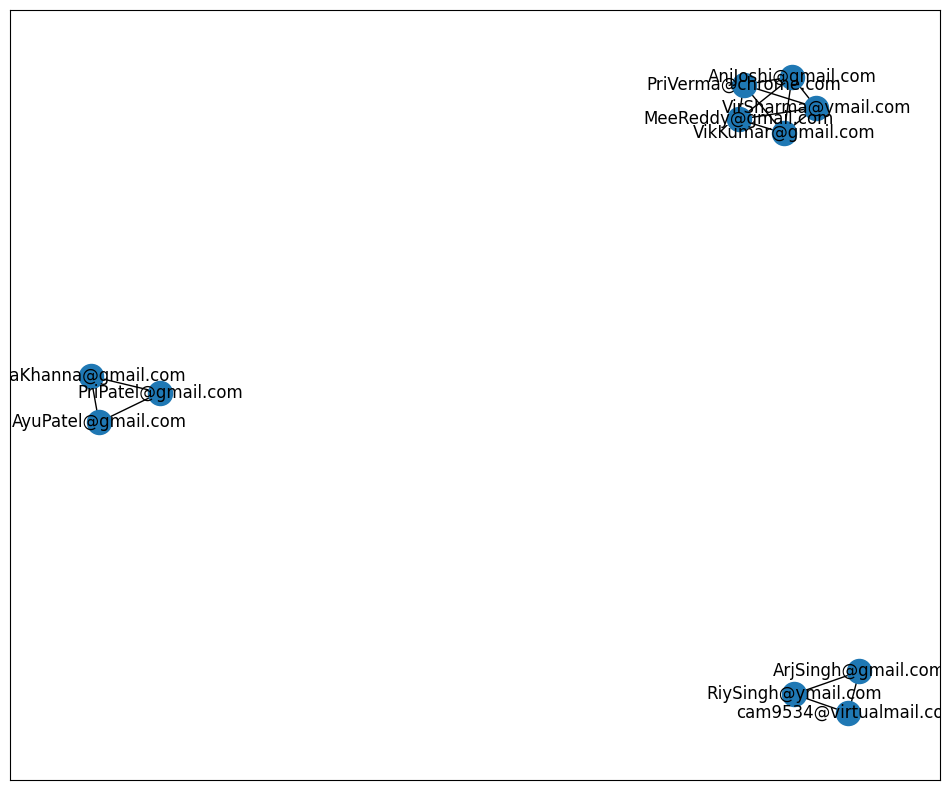

In [81]:
plt.figure(figsize=(12,10))
nx.draw_networkx(G,with_labels=True)

In [58]:
pip install NetworkX

In [37]:
import networkx as nx
df_net = nx.from_pandas_edgelist(df_spam, source='phone_number', target='connection', edge_attr=True)

In [38]:
df_net.nodes()

NodeView((9876614987, 'AdiSharma@gmail.com', 9842634348, 'AyuPatel@gmail.com', 'JhaKhanna@gmail.com', 9829992806, 'cam9534@virtualmail.com', 'RiySingh@ymail.com', 9823899308, 'NisGupta@gmail.com', 9847688193, 'VikChatterjee@gmail.com', 9839330212, 'AyeKhan@gmail.com', 9888805195, 'RajKhanna@gmail.com', 9835396468, 'MeeDesai@gmail.com', 9864363931, 'SidKapoor@gmail.com', 9855787171, 'VirSharma@ymail.com', 'PriVerma@chrome.com', 'MeeReddy@gmail.com', 'VikKumar@gmail.com', 9816452665, 'RohMalhotra@gmail.com', 9835123395, 'PooMehta@gmail.com', 9821796978, 'RahVerma@gmail.com', 9892511865, 'JayShah@gmail.com', 9888323723, 'san1234@virtualmail.com', 9942427844, 'fab3894@virtualmail.com', 9919987271, 9965515861, 9932638184, 9988168742, 9996040894, 9978734790, 9931932095, 9965022136, 'KavShah@gmail.com', 9953938746, 'ArjSharma@gmail.com', 9960631568, 'PriKhanna@gmail.com', 9951534154, 'YasVerma@gmail.com', 9954320304, 'AisChatterjee@gmail.com', 9937100035, 'SidPatel@gmail.com', 9971924451, 'Di

In [39]:
df_net.edges()

EdgeView([(9876614987, 'AdiSharma@gmail.com'), (9842634348, 'AyuPatel@gmail.com'), (9842634348, 'JhaKhanna@gmail.com'), (9829992806, 'cam9534@virtualmail.com'), (9829992806, 'RiySingh@ymail.com'), ('cam9534@virtualmail.com', 9932638184), ('cam9534@virtualmail.com', 9988168742), ('cam9534@virtualmail.com', 9996040894), ('cam9534@virtualmail.com', 9978734790), (9823899308, 'NisGupta@gmail.com'), (9847688193, 'VikChatterjee@gmail.com'), (9839330212, 'AyeKhan@gmail.com'), (9888805195, 'RajKhanna@gmail.com'), (9835396468, 'MeeDesai@gmail.com'), (9864363931, 'SidKapoor@gmail.com'), (9855787171, 'VirSharma@ymail.com'), (9855787171, 'PriVerma@chrome.com'), (9855787171, 'MeeReddy@gmail.com'), (9855787171, 'VikKumar@gmail.com'), (9816452665, 'RohMalhotra@gmail.com'), (9835123395, 'PooMehta@gmail.com'), (9821796978, 'RahVerma@gmail.com'), (9892511865, 'JayShah@gmail.com'), (9888323723, 'san1234@virtualmail.com'), ('san1234@virtualmail.com', 9919987271), ('san1234@virtualmail.com', 9965515861), (9

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

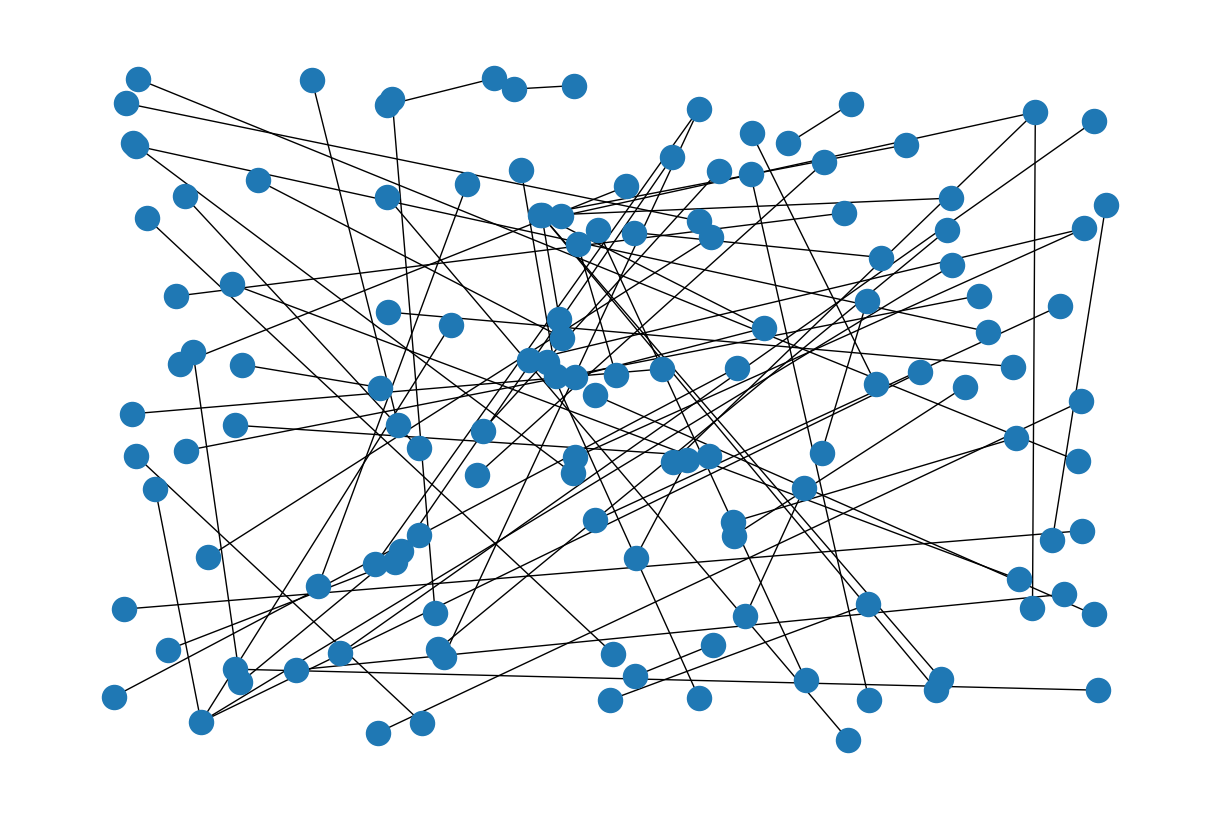

In [50]:
plt.figure(figsize=(12,8))
nx.draw_random(df_net)